In [32]:
import numpy as np 
from scipy import fftpack 
import pandas as pd
from matplotlib import pyplot as plt
import math 
from array import *

In [33]:
data =  pd.read_excel (r'F:\Data for US pulses\Two Pulses for castor oil in different sample cell 10mm and 25mm.xlsx')
print(data)

      Time  First pulse for SC-10 mm  Second pulse for SC-25 mm  Unnamed: 3  \
0     4.00                   0.08984                    0.07422         NaN   
1     4.01                   0.08203                    0.10156         NaN   
2     4.02                   0.08203                    0.09375         NaN   
3     4.03                   0.09766                    0.09766         NaN   
4     4.04                   0.06641                    0.06641         NaN   
5     4.05                   0.11719                    0.10156         NaN   
6     4.06                   0.11719                    0.10156         NaN   
7     4.07                   0.09375                    0.10156         NaN   
8     4.08                   0.10156                    0.11719         NaN   
9     4.09                   0.06641                    0.09375         NaN   
10    4.10                   0.10156                    0.06250         NaN   
11    4.11                   0.10156                

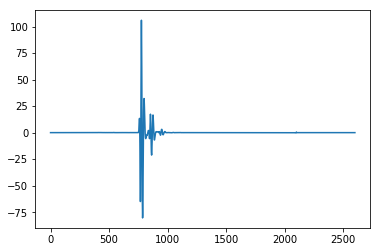

In [34]:
Before= data['10m']
plt.plot(Before)
plt.show()

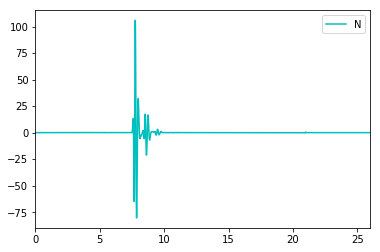

In [35]:
dt = 0.01
t = np.arange(0,26,dt)
f = Before
plt.plot(t,f,color='c',LineWidth=1.5,label='N')
plt.xlim(t[0],t[-1])
plt.legend()


[0.0000e+00 2.6000e+05 5.2000e+05 ... 6.7522e+08 6.7548e+08 6.7574e+08]


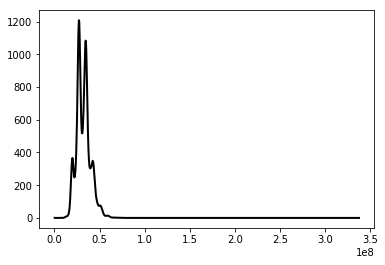

In [36]:
#Fast Fourier transform (FFT)
n = len(t)
fhat = np.fft.fft(f,n) #compute the FFT
PSD = fhat * np.conj(fhat)/n            #Power spectrum densoty
freq = (1/dt*n)*np.arange(n)
#freq = (1/dt)#creat x-axis of freq
freqq = (4,21,100)

L = np.arange(1,np.floor(n/2),dtype='int') 

print(freq)

plt.plot(freq[L],PSD[L],color='k',LineWidth=2,label='C')

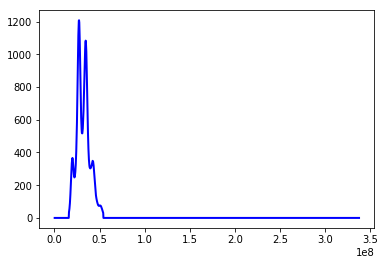

In [37]:
# By using PSD data, we can fillter out the noise 

indices = PSD>30
PSDclean = indices * PSD
fhat = indices*fhat
ifftt = np.fft.ifft(fhat)

plt.plot(freq[L],PSDclean[L],color='b',LineWidth=2,label='C')


plt.show()

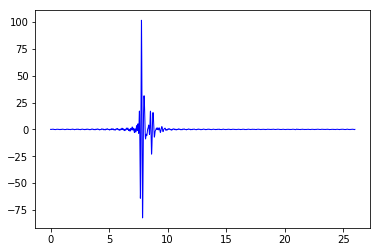

In [38]:
plt.plot(t,ifftt,color='b',LineWidth=1,label='C')

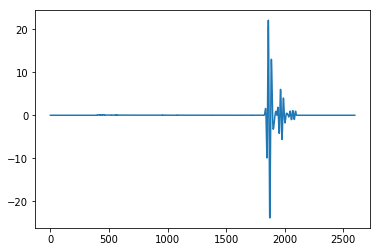

In [39]:
##Second pules
Second_P = data['25m']
plt.plot(Second_P)
plt.show()


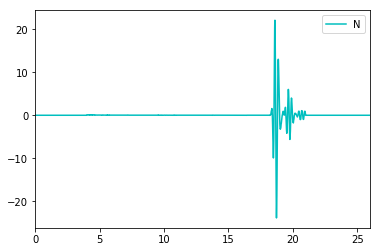

In [40]:
dt = 0.01
t = np.arange(0,26,dt)
f = Second_P
plt.plot(t,f,color='c',LineWidth=1.5,label='N')
plt.xlim(t[0],t[-1])
plt.legend()

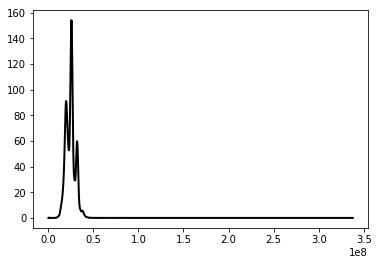

In [41]:
n = len(t)
fhat_Second = np.fft.fft(f,n) #compute the FFT
PSD_Second = fhat_Second * np.conj(fhat_Second)/n            #Power spectrum densoty
freq_Second = (1/dt*n)*np.arange(n)#creat x-axis of freq
Freq = (0,25,)
L = np.arange(1,np.floor(n/2),dtype='int')   
q = np.array(PSD_Second)
y = np.vectorize(PSD_Second)
plt.plot(freq_Second[L],PSD_Second[L],color='k',LineWidth=2,label='C')
print(y)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


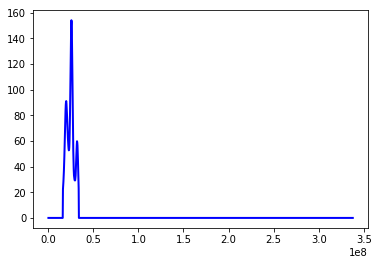

In [42]:
# By using PSD, we can fillter out the noise 

indices_Second = PSD_Second>20
PSDclean_Second = indices_Second * PSD_Second
fhat_Second = indices_Second*fhat_Second
ifftt_Second = np.fft.ifft(fhat_Second)

plt.plot(freq_Second[L],PSDclean_Second[L],color='b',LineWidth=2,label='C')

print(PSDclean_Second)


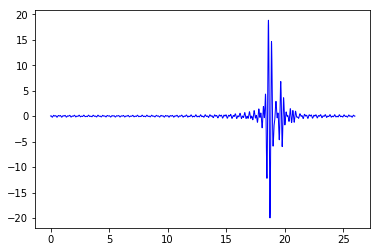

In [43]:
plt.plot(t,ifftt_Second,color='b',LineWidth=1,label='C')

In [44]:
alpha = -(np.log((abs((PSDclean_Second/PSDclean)))))/1.5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [45]:
print(alpha)
print(freq_Second)

[nan nan nan ... nan nan nan]
[0.0000e+00 2.6000e+05 5.2000e+05 ... 6.7522e+08 6.7548e+08 6.7574e+08]


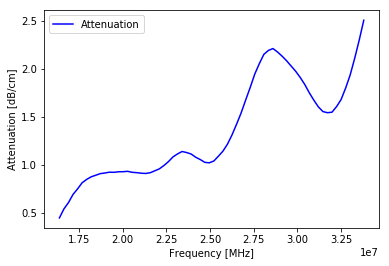

In [46]:
plt.plot(freq_Second[L],alpha[L],color='b',label='Attenuation')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB/cm]')
plt.legend()
plt.show()

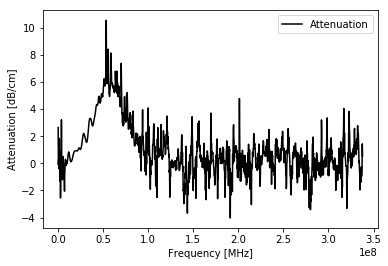

In [47]:
alpha2 = -(np.log((abs((PSD_Second/PSD)))))/1.5
plt.plot(freq_Second[L],alpha2[L],color='k',label='Attenuation')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB/cm]')
plt.legend()
plt.show()